# VALVE FULL DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [3]:
zero = pd.read_csv('datasets/valve/0_dB_valve_filepath_features_and_std.csv')
six = pd.read_csv('datasets/valve/valve_6dB_filepath_features_and_std.csv')
neg = pd.read_csv('datasets/valve/-6_dB_valve_filepath_features_and_std.csv')

In [4]:
d = six.append(zero)
df = d.append(neg)

In [5]:
df.to_csv('datasets/valve/valve_full_features_with_std.csv')

In [6]:
df.shape

(12510, 75)

In [7]:
df.columns

Index(['Type of SNR', 'Type of Machine', 'Model Number', 'Status', 'File Name',
       'y', 'SR', 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
  

In [8]:
df1 = df[[ 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
       'zero_crossing_rate mean', 'zero_crossing_rate max', 'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

In [9]:
df['Status'].replace({'abnormal' : 1, 'normal' : 0}, inplace=True)

In [10]:
df['Status'].value_counts()

0    11073
1     1437
Name: Status, dtype: int64

In [11]:
X = df1.values
y = df['Status'].values
X.shape, y.shape

((12510, 68), (12510,))

#### DIVIDE THE MODEL INTO MODEL AND VALIDATION SET

In [12]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

### DIVIDE THE MODEL INTO TRAIN AND TEST

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [14]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.952753108348135

In [15]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2481
           1       0.99      0.61      0.75       334

    accuracy                           0.95      2815
   macro avg       0.97      0.80      0.86      2815
weighted avg       0.95      0.95      0.95      2815



y max
y min
rms max
spec_contrast max
rolloff max
poly_0 max
poly_1 min
poly_1 max
rms std
poly_0 std
zero_crossing_rate std


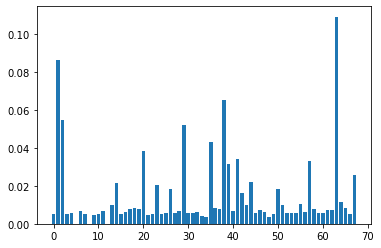

In [16]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        #print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
        print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### DO SMOTE

In [17]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [18]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9648312611012433

In [19]:
y_test_pred = rf.predict(X_test)

In [20]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2458,76
1,23,258


In [21]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2481
           1       0.92      0.77      0.84       334

    accuracy                           0.96      2815
   macro avg       0.94      0.88      0.91      2815
weighted avg       0.96      0.96      0.96      2815



In [23]:
filename = 'datasets/models/valve_models/valve_ALLft_resample.sav'
pickle.dump(rf, open(filename, 'wb'))


### LESSER COLUMNS

In [45]:
les = df[['y max', 'y min', 'rms max', 'spec_contrast max', 'rolloff max', 
'poly_0 max', 'poly_1 min', 'poly_1 max', 'rms std', 'poly_0 std','zero_crossing_rate std']].copy()

In [46]:
X = les.values
y = df['Status'].values
X.shape, y.shape

((12510, 11), (12510,))

In [47]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [49]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9591474245115453

In [50]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [51]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.955595026642984

In [52]:
y_test_pred = rf.predict(X_test)

In [53]:
validation_test = rf.predict(X_validate)

In [54]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1078,25
1,36,112


In [55]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2404,48
1,77,286


In [56]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2481
           1       0.79      0.86      0.82       334

    accuracy                           0.96      2815
   macro avg       0.88      0.91      0.90      2815
weighted avg       0.96      0.96      0.96      2815



In [37]:
filename = 'datasets/models/valve_models/valve_11ft_resample.sav'
pickle.dump(rf, open(filename, 'wb'))

### ANOTHER LESSER COLUMNS

y max
y min
rms max
spec_contrast max
rolloff max
poly_0 max
poly_1 min
poly_1 max
rms std
poly_0 std
zero_crossing_rate std


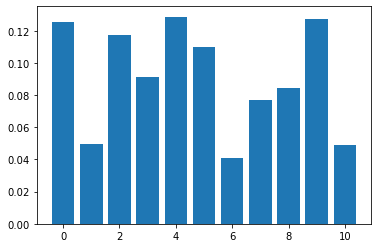

In [57]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        #print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
        print(les.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [58]:
test3 = df[['y max', 'rms max', 'spec_contrast max', 'rolloff max', 
'poly_0 max', 'poly_1 max', 'rms std', 'poly_0 std']].copy()

In [59]:
X = test3.values
y = df['Status'].values
X.shape, y.shape

((12510, 8), (12510,))

In [60]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [74]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9566607460035524

In [75]:
filename = 'datasets/models/valve_models/valve_rf_8cols.sav'
pickle.dump(rf, open(filename, 'wb'))

In [65]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [66]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9488454706927176

In [67]:
y_test_pred = rf.predict(X_test)

In [68]:
validation_test = rf.predict(X_validate)

In [69]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1068,18
1,46,119


In [70]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2391,54
1,90,280


In [71]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2481
           1       0.76      0.84      0.80       334

    accuracy                           0.95      2815
   macro avg       0.87      0.90      0.88      2815
weighted avg       0.95      0.95      0.95      2815



In [72]:
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1114
           1       0.72      0.87      0.79       137

    accuracy                           0.95      1251
   macro avg       0.85      0.91      0.88      1251
weighted avg       0.95      0.95      0.95      1251



Feature: y max, Score: 0.15159
Feature: rms max, Score: 0.12713
Feature: spec_contrast max, Score: 0.11516
Feature: rolloff max, Score: 0.13249
Feature: poly_0 max, Score: 0.13106
Feature: poly_1 max, Score: 0.08942
Feature: rms std, Score: 0.10088
Feature: poly_0 std, Score: 0.15228


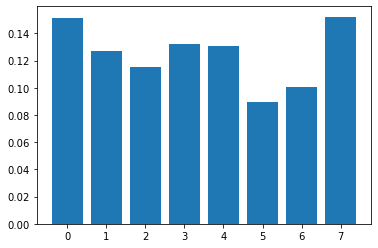

In [73]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        print(f'Feature: {test3.columns[i]}, Score: {v:.5f}')
        #print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
 y max,
Feature: rms max,
Feature: spec_contrast max, Score: 0.11516
Feature: rolloff max, Score: 0.13249
Feature: poly_0 max, Score: 0.13106
Feature: poly_1 max, Score: 0.08942
Feature: rms std, Score: 0.10088
Feature: poly_0 std

In [77]:
test4 = df[['chroma_stft mean', 'chroma_cqt mean', 'melspectogram mean',  'rms mean', 'poly_0 mean',
            'poly_1 mean', 'poly_2 mean', 'tonnetz mean']]
X = test4.values
y = df['Status'].values
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9367493995196157

In [80]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [81]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9322124366159594

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

validation_test = rf.predict(X_validate)
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

y_test_pred = rf.predict(X_test)
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

print(classification_report(y_validate,validation_test))
print(classification_report(y_test,y_test_pred))

In [82]:
validation_test = rf.predict(X_validate)

In [83]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1160,53
1,73,379


In [84]:
y_test_pred = rf.predict(X_test)
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2617,120
1,134,876


In [85]:
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1233
           1       0.84      0.88      0.86       432

    accuracy                           0.92      1665
   macro avg       0.90      0.91      0.90      1665
weighted avg       0.93      0.92      0.92      1665



In [86]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2751
           1       0.87      0.88      0.87       996

    accuracy                           0.93      3747
   macro avg       0.91      0.92      0.91      3747
weighted avg       0.93      0.93      0.93      3747



Feature: chroma_stft mean, Score: 0.15094
Feature: melspectogram mean, Score: 0.09972
Feature: mfcc mean, Score: 0.13189
Feature: rms mean, Score: 0.13804
Feature: rolloff min, Score: 0.11952
Feature: poly_0 mean, Score: 0.12358
Feature: poly_1 mean, Score: 0.11934
Feature: poly_2 mean, Score: 0.11696


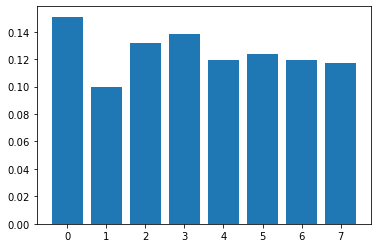

In [88]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        print(f'Feature: {test3.columns[i]}, Score: {v:.5f}')
        #print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()